# Access to Financial Markets
- This notebook studies *financial inclusion* in Mexico, whether a household has access to financial markets to store money or take out loans.

### Findings
- Financial inclusion increases significantly with income, education, and whether the household head is male.
- Financial inclusion varies significantly with specific locations but displays a weak relationship with population density.
- The majority of households interact with the financial market through savings or debts. Few households possess real estate as a financial asset or securities and bonds.

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os; home = os.path.expanduser('~')
import sys

plt.style.use('ggplot')

sys.path.append(home + '/github/ENIGH/')
import src.utils as utils
import src.json_utils as json_utils

interim = home + '/Dropbox/data/mexico_enigh/interim2/'
processed = home + '/Dropbox/data/mexico_enigh/processed2'
dicts = home + '/github/ENIGH/dicts/'

os.chdir(processed)
df = pd.read_csv('data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20399 entries, 0 to 20398
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   consumption_transportation  20399 non-null  float64
 1   income_salary               20399 non-null  float64
 2   income_total                20399 non-null  float64
 3   location_size               20399 non-null  int64  
 4   hhid                        20399 non-null  int64  
 5   consumption_food            20399 non-null  float64
 6   consumption_clothing        20399 non-null  float64
 7   consumption_total           20399 non-null  float64
 8   weight                      20399 non-null  float64
 9   income_rental               20399 non-null  float64
 10  location                    20399 non-null  object 
 11  income_transfers            20399 non-null  float64
 12  income_current              20399 non-null  float64
 13  financial_expenditures      203

In [6]:
df

,consumption_transportation,income_salary,income_total,location_size,hhid,consumption_food,consumption_clothing,consumption_total,weight,income_rental,...,age,type_of_education,is_household_head,Y,income,consumption,cpi,log_income,log_consumption,age_sq
0,7.834090,36.826188,51.603890,1,19940110010,5.867128,4.182728,43.547649,169.0,0.0,...,30,0,True,1994,36.826188,12.826595,19.551304,3.606209,2.551521,900
1,0.000000,47.055685,57.175044,1,19940110030,17.903154,3.667275,44.265249,169.0,0.0,...,56,0,True,1994,47.055685,24.818805,19.551304,3.851332,3.211602,3136
2,1.209979,41.429462,69.337660,1,19940110040,12.873225,5.225568,62.225261,169.0,0.0,...,56,0,True,1994,56.262232,23.500223,19.551304,4.030023,3.157010,3136
3,7.489219,61.990750,92.738469,1,19940110060,20.684452,0.102295,67.675077,153.0,0.0,...,49,0,True,1994,77.334995,22.068809,19.551304,4.348147,3.094165,2401
4,13.770522,72.458935,142.232968,1,19940110070,35.560885,11.346217,149.621478,153.0,0.0,...,38,0,True,1994,110.819548,58.902636,19.551304,4.707903,4.075886,1444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20394,6.268540,33.833325,35.994922,1,19963399020,14.840565,0.498830,31.639798,1351.0,0.0,...,40,0,True,1996,33.833325,17.261058,35.467989,3.521446,2.848453,1600
20395,5.774503,0.000000,29.655967,1,19963399030,8.360638,0.285046,25.554874,1351.0,0.0,...,29,0,True,1996,20.793398,9.475728,35.467989,3.034636,2.248734,841
20396,0.000000,10.673609,15.184759,1,19963399040,3.824656,0.408860,13.054307,1351.0,0.0,...,32,0,True,1996,10.673609,5.710783,35.467989,2.367774,1.742356,1024
20397,10.210898,49.622210,88.257518,2,19963399060,18.984631,2.299444,89.016606,1077.0,0.0,...,45,0,True,1996,49.622210,38.139556,35.467989,3.904439,3.641252,2025


In [7]:
os.chdir(interim)
capital_expenditures = pd.read_csv('capital_expenditures.csv')
capital_expenditures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11367 entries, 0 to 11366
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   hhid                                               11367 non-null  int64  
 1   expense_credit_card_payments                       11367 non-null  float64
 2   expense_debt_to_work_or_person                     11367 non-null  float64
 3   expense_deposits_savings                           11367 non-null  float64
 4   expense_foreigncurrencies_perciousmetals_art       11367 non-null  float64
 5   expense_hhbusiness_machinery_animal_equipment      11367 non-null  float64
 6   expense_hhbusiness_negative_balance                11367 non-null  float64
 7   expense_life_insurance                             11367 non-null  float64
 8   expense_loans_to_third_parties                     11367 non-null  float64
 9   expens

In [8]:
os.chdir(interim)
capital_income = pd.read_csv('capital_income.csv')
capital_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   hhid                                                     6484 non-null   int64  
 1   income_coins_preciousmetals_art                          6484 non-null   float64
 2   income_from_loans_to_institutions_not_mortgage           6484 non-null   float64
 3   income_from_loans_to_third_parties_not_in_household      6484 non-null   float64
 4   income_hhbusiness_machinery_animal_equipment             6484 non-null   float64
 5   income_house_land_condiminum                             6484 non-null   float64
 6   income_interest_fixed_investments                        6484 non-null   float64
 7   income_interest_loans_to_third_parties                   6484 non-null   float64
 8   income_interest_savings_acco

In [9]:
df = df.merge(capital_expenditures, on='hhid', how='left')
df[capital_expenditures.columns] = df[capital_expenditures.columns].fillna(value=0)

In [10]:
df = df.merge(capital_income, on='hhid', how='left')
df[capital_income.columns] = df[capital_income.columns].fillna(value=0)

In [11]:
import statsmodels.stats.weightstats as ws
def get_deciles(x, weights=None):
    stats = ws.DescrStatsW(x, weights=weights)

    deciles =  np.arange(0.1, 1.1, .1)
    income_deciles = stats.quantile(deciles).values
    x_deciles = np.array([np.argmax(income_deciles > xi) for xi in x])
    return x_deciles + 1

print(len(df))
deciles = []
for Y in np.sort(df.Y.unique()):
    data = df.query('Y == @Y')[['hhid', 'income', 'weight']]
    data['decile'] = get_deciles(data['income'], data['weight'])
    data['Y'] = Y
    deciles.append(data)
deciles = pd.concat(deciles)
df = df.merge(deciles[['hhid', 'Y', 'decile']], on=['hhid', 'Y'], how='outer')

20399


In [12]:
expense_labels = json_utils.load_json(dicts + 'expense_labels.json')
expense_labels

{'has_expense_credit_card_payments': 'Credit Card',
 'has_expense_debt_to_work_or_person': 'Debts',
 'has_expense_deposits_savings': 'Deposits / Savings',
 'has_expense_foreigncurrencies_perciousmetals_art': 'Foreign Currencies/ Precious Metals/ Art',
 'has_expense_hhbusiness_machinery_animal_equipment': 'Business: Machinary/ Animal/ Equipment',
 'has_expense_hhbusiness_negative_balance': 'Business: Negative balance',
 'has_expense_life_insurance': 'Life Insurance',
 'has_expense_loans_to_third_parties': 'Loans to Others',
 'has_expense_other': 'Other',
 'has_expense_realestate_hh_inhabit': 'Real Estate (Inhabited)',
 'has_expense_realestate_hh_not_inhabit': 'Real Estate (Not Inhabited)',
 'has_expense_realestate_mortgage': 'Real Estate (Mortgage)',
 'has_expense_securities_shares_bond': 'Securities / Bonds',
 'has_expense_trademarks_patents_copyrights': 'Trademarks / Patents / Copyrights',
 'has_expense_inheritance_dowrie_legacies': 'Inheritance / Dowrie / Legacy',
 'has_income_coins_

In [13]:
df

,consumption_transportation,income_salary,income_total,location_size,hhid,consumption_food,consumption_clothing,consumption_total,weight,income_rental,...,has_income_interest_loans_to_third_parties,has_income_interest_savings_accounts,has_income_interest_shares_bonds,has_income_land_landrental,has_income_realestate_mortgage,has_income_rental_houses_buildings_other_realestate,has_income_rental_trademarks_patents_copyrights,has_income_securities_bonds,has_income_withdrawal_savings,decile
0,7.834090,36.826188,51.603890,1,19940110010,5.867128,4.182728,43.547649,169.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.000000,47.055685,57.175044,1,19940110030,17.903154,3.667275,44.265249,169.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,1.209979,41.429462,69.337660,1,19940110040,12.873225,5.225568,62.225261,169.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,7.489219,61.990750,92.738469,1,19940110060,20.684452,0.102295,67.675077,153.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8
4,13.770522,72.458935,142.232968,1,19940110070,35.560885,11.346217,149.621478,153.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20394,6.268540,33.833325,35.994922,1,19963399020,14.840565,0.498830,31.639798,1351.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
20395,5.774503,0.000000,29.655967,1,19963399030,8.360638,0.285046,25.554874,1351.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
20396,0.000000,10.673609,15.184759,1,19963399040,3.824656,0.408860,13.054307,1351.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
20397,10.210898,49.622210,88.257518,2,19963399060,18.984631,2.299444,89.016606,1077.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [14]:
has_expense_columns = [x for x in df.columns if ('has_expense' in x)]
has_expense = pd.DataFrame(index=has_expense_columns)

has_expense['percent'] = [
    100 * np.average(df[x], axis=0, weights=df['weight'])
    for x in has_expense_columns
]
has_expense = has_expense.sort_values('percent', ascending=False)
df['has_expense_any'] = (df[has_expense_columns].astype(int).sum(axis=1) > 0) + 0
has_expense

,percent
has_expense_deposits_savings,31.409754
has_expense_credit_card_payments,8.665196
has_expense_debt_to_work_or_person,7.835113
has_expense_hhbusiness_negative_balance,3.972942
has_expense_loans_to_third_parties,3.080558
has_expense_foreigncurrencies_perciousmetals_art,1.089991
has_expense_hhbusiness_machinery_animal_equipment,0.982663
has_expense_life_insurance,0.907522
has_expense_realestate_hh_not_inhabit,0.820270
has_expense_realestate_hh_inhabit,0.398113


Text(0.5, 1.0, 'Financial Expenses')

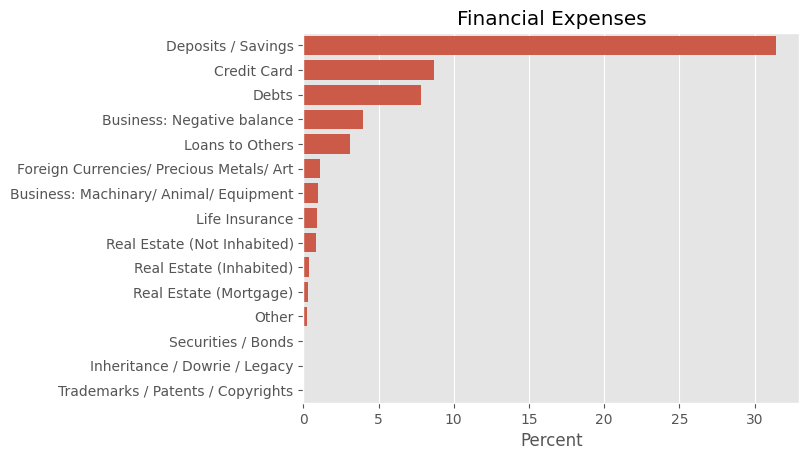

In [15]:
labels = [expense_labels[x] for x in has_expense.index.values]
sns.barplot(y = labels , x= has_expense['percent'], 
            orient='h')
plt.xlabel('Percent')
plt.title('Financial Expenses')

In [16]:
has_income_columns = [x for x in df.columns if ('has_income' in x)]
has_income = pd.DataFrame(index=has_income_columns)

has_income['percent'] = [
    100 * np.average(df[x], axis=0, weights=df['weight'])
    for x in has_income_columns
]
has_income = has_income.sort_values('percent', ascending=False)
df['has_income_any'] = (df[has_income_columns].sum(axis=1) > 0) + 0
has_income

,percent
has_income_from_loans_to_third_parties_not_in_household,8.168661
has_income_withdrawal_savings,6.634913
has_income_coins_preciousmetals_art,5.111892
has_income_from_loans_to_institutions_not_mortgage,4.355619
has_income_rental_houses_buildings_other_realestate,1.558063
has_income_interest_savings_accounts,0.473548
has_income_land_landrental,0.419380
has_income_interest_fixed_investments,0.323135
has_income_hhbusiness_machinery_animal_equipment,0.229249
has_income_house_land_condiminum,0.226876


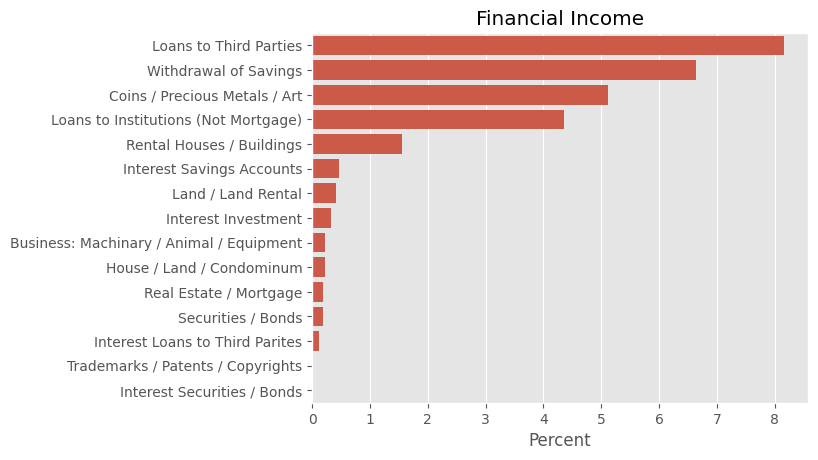

In [17]:
labels = [expense_labels[x] for x in has_income.index.values]
sns.barplot(y = labels , x= has_income['percent'], 
            orient='h')
plt.title('Financial Income')
plt.xlabel('Percent');

In [18]:
df['included'] = df['has_expense_any'] | df['has_income_any']

In [19]:
df['included'] = df['included'].replace({0:'N', 1:'Y'})
df['included'] = pd.Categorical(df['included']).reorder_categories(['Y', 'N'])

In [20]:
included_by_decile = (100*pd.crosstab(df.decile, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
included_by_decile = included_by_decile.melt(id_vars='decile', var_name='Included', value_name='Percent')
included_by_decile

,decile,Included,Percent
0,1,Y,38.961650
1,2,Y,37.530172
2,3,Y,38.897042
3,4,Y,37.369851
4,5,Y,44.958270
5,6,Y,44.958846
6,7,Y,50.509345
7,8,Y,58.015675
8,9,Y,67.436670
9,10,Y,81.777183


Text(0.5, 1.0, 'Income and Financial Inclusion')

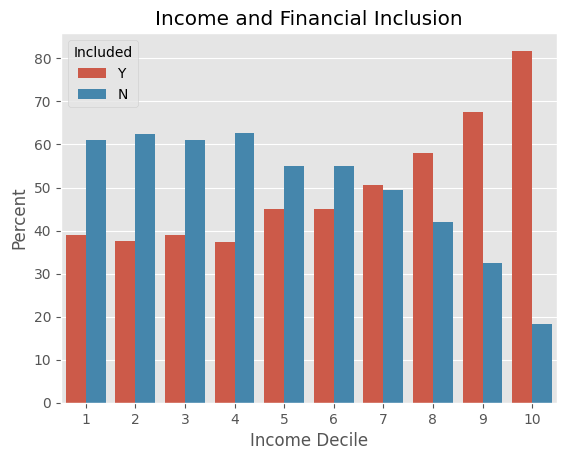

In [21]:
sns.barplot(included_by_decile, x='decile', hue='Included', y='Percent')
plt.xlabel('Income Decile')
plt.title('Income and Financial Inclusion')

In [22]:
df['education'] = pd.Categorical(df['education']).reorder_categories(['Low', 'Medium', 'High'])

included_by_education = (100*pd.crosstab(df.education, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
included_by_education = included_by_education.melt(id_vars='education', var_name='Included', value_name='Percent')
included_by_education

,education,Included,Percent
0,Low,Y,43.650995
1,Medium,Y,52.700992
2,High,Y,73.534438
3,Low,N,56.349005
4,Medium,N,47.299008
5,High,N,26.465562


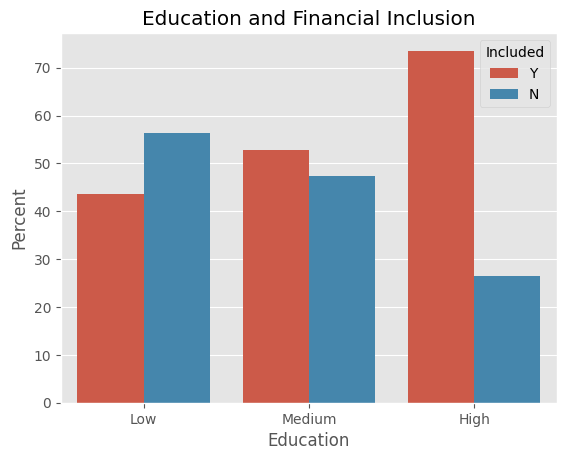

In [23]:
sns.barplot(included_by_education, x='education', y='Percent', hue='Included')
plt.xlabel('Education')
plt.title('Education and Financial Inclusion');

In [24]:
included_by_location_size = (100*pd.crosstab(df.location_size, df.included, df.weight, aggfunc='sum', normalize='index')).reset_index()
included_by_location_size = included_by_location_size.melt(id_vars='location_size', var_name='Included', value_name='Percent')
included_by_location_size

,location_size,Included,Percent
0,1,Y,52.467610
1,2,Y,48.659038
2,3,Y,48.370744
3,4,Y,46.310192
4,1,N,47.532390
5,2,N,51.340962
6,3,N,51.629256
7,4,N,53.689808


/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_50829/2797569777.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(location_labels.values())


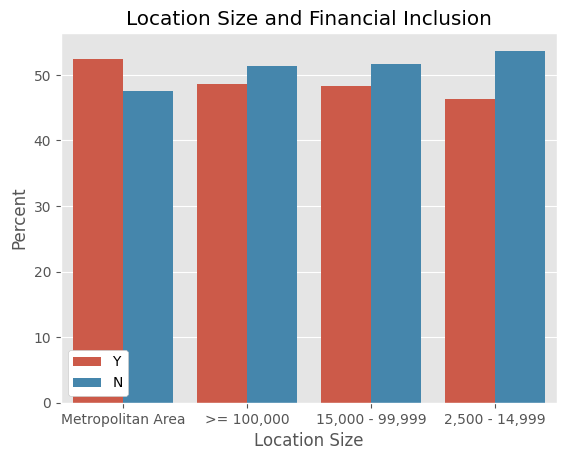

In [25]:
os.chdir(dicts)
location_labels = json_utils.load_json('location_labels.json')

ax = sns.barplot(included_by_location_size, x='location_size', y='Percent', hue='Included')
ax.set_ylabel('Percent')
ax.set_xticklabels(location_labels.values())
ax.set_xlabel('Location Size');
ax.legend(loc='lower left', framealpha=1.0, facecolor='white')
ax.set_title('Location Size and Financial Inclusion');

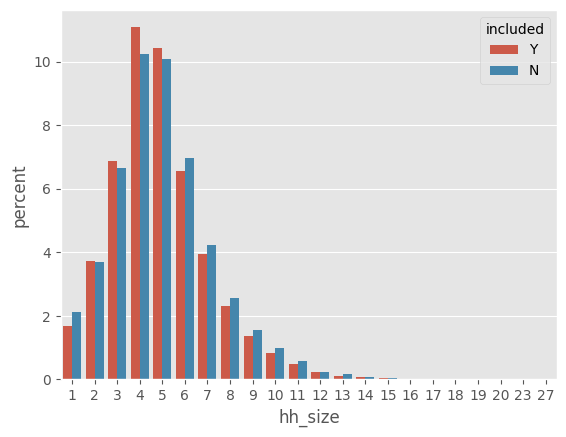

In [26]:
sns.countplot(df, x='hh_size', hue='included', stat='percent')
ax.legend(title='Included')
ax.set_ylabel('Percent')
ax.set_xlabel('Household Size');

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_50829/924031005.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=6);


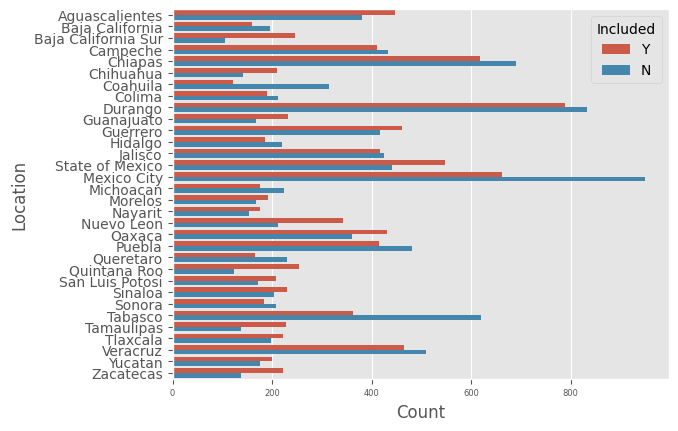

In [27]:
ax = sns.countplot(df, y= 'location', hue='included', orient='h')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6);
ax.set_ylabel('Location')
ax.set_xlabel('Count')
ax.legend(title='Included');

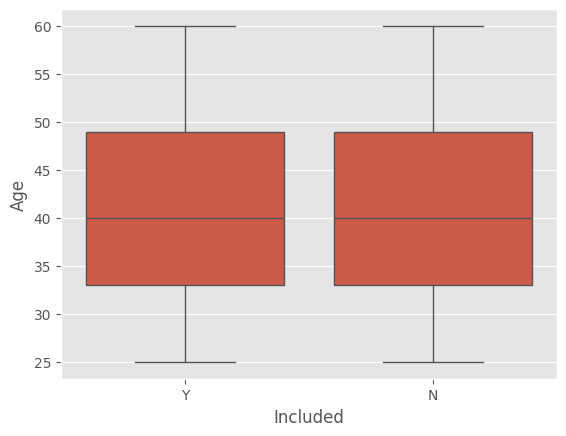

In [28]:
ax = sns.boxplot(
    df, x='included', y='age'
)
ax.set_ylabel('Age')
ax.set_xlabel('Included');

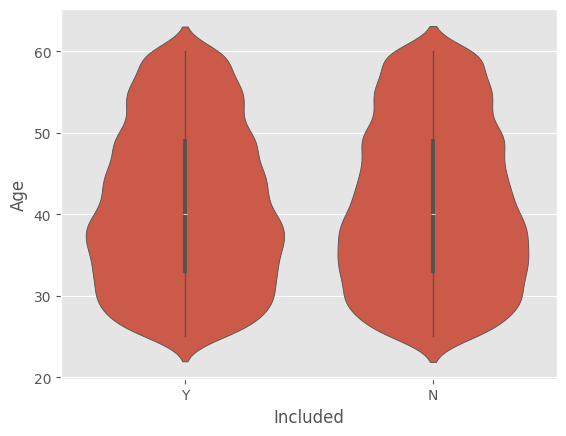

In [29]:
sns.violinplot(df, 
               x='included', y='age')
plt.xlabel('Included')
plt.ylabel('Age');

# Logistic Regression
- This section studies financial inclusion using regression, which allows us to include all variables such as income, age, education, etc.

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.weightstats as ws

from statsmodels.genmod.families.links import logit
logit_model = sm.families.Binomial(logit()) # basic logit model

# reencode included (financial inclusion) to an indicator variable for models
df['included'] = df['included'].replace({'Y':1, 'N':0}).astype(int)

/Users/mitch/envs/main/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [31]:
y = 'included'
Z = '~ C(decile) + age + I(age**2) + C(education) + C(sex) + C(location)'
D = ' + C(Y)'

reg = y + Z + D

models = {}

models['included'] = smf.glm('included' + Z + D, df, missing='drop', freq_weights=df['weight'], family=logit_model).fit()
models['has_expense_any'] = smf.glm('has_expense_any' + Z + D, df, missing='drop', freq_weights=df['weight'], family=logit_model).fit()
models['creditcard'] = smf.glm('has_expense_credit_card_payments' + Z + D, df, missing='drop', freq_weights=df['weight'], family=logit_model).fit()
models['has_income_any'] = smf.glm('has_income_any' + Z + D, df, missing='drop', freq_weights=df['weight'], family=logit_model).fit()

In [32]:
models['included'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               included   No. Observations:                20399
Model:                            GLM   Df Residuals:                 30643520
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.9380e+07
Date:                Thu, 25 Jan 2024   Deviance:                   3.8760e+07
Time:                        15:02:16   Pearson chi2:                 3.07e+07
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.4199      0.009   -165.553      0.000      -1.437      -1.403
C(decile)[T.2]                        -0.0759      0.002    -44.251      0.000      -0.079      -0.073
C(decile)[T.3]                        -0.0128      0.002     -7.495      0.000      -0.016      -0.009
C(decile)[T.4]                        -0.0390      0.002    -22.406      0.000      -0.042      -0.036
C(decile)[T.5]                         0.2793      0.002    160.191      0.000       0.276       0.283
C(decile)[T.6]                         0.2918      0.002    166.660      0.000       0.288       0.295
C(decile)[T.7]                         0.5430      0.002    305.690      0.000       0.540       0.547
C(decile)[T.8]                         0.8202      0.002    453.395      0.000       0.817       0.824
C(decile)[T.9]                         1.1889      0.002    624.638      0.000       1.185       1.193
C(decile)[T.10]                        1.9150      0.002    864.796      0.000       1.911       1.919
C(education)[T.Medium]                 0.0575      0.001     57.162      0.000       0.056       0.059
C(education)[T.High]                   0.3929      0.002    257.087      0.000       0.390       0.396
C(sex)[T.Male]                         0.3496      0.001    303.036      0.000       0.347       0.352
C(location)[T.Baja California]        -0.7142      0.005   -149.604      0.000      -0.724      -0.705
C(location)[T.Baja California Sur]     0.4078      0.007     54.763      0.000       0.393       0.422
C(location)[T.Campeche]               -0.2166      0.006    -35.968      0.000      -0.228      -0.205
C(location)[T.Chiapas]                -0.4243      0.005    -88.884      0.000      -0.434      -0.415
C(location)[T.Chihuahua]               0.1434      0.007     21.953      0.000       0.131       0.156
C(location)[T.Coahuila]               -1.2569      0.005   -270.694      0.000      -1.266      -1.248
C(location)[T.Colima]                 -0.4630      0.005   -101.029      0.000      -0.472      -0.454
C(location)[T.Durango]                -0.7260      0.004   -170.088      0.000      -0.734      -0.718
C(location)[T.Guanajuato]              0.0789      0.005     15.409      0.000       0.069       0.089
C(location)[T.Guerrero]                0.1186      0.004     26.484      0.000       0.110       0.127
C(location)[T.Hidalgo]                -0.3586      0.005    -77.639      0.000      -0.368      -0.350
C(location)[T.Jalisco]                -0.3071      0.005    -64.226      0.000      -0.317      -0.298
C(location)[T.Mexico City]            -0.4994      0.004   -118.183      0.000      -0.508      -0.491
C(location)[T.Michoacan]              -0.3462      0.005    -76.889      0.000      -0.355      

In [33]:
models['has_expense_any'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        has_expense_any   No. Observations:                20399
Model:                            GLM   Df Residuals:                 30643520
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8754e+07
Date:                Thu, 25 Jan 2024   Deviance:                   3.7508e+07
Time:                        15:02:16   Pearson chi2:                 3.07e+07
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.9407      0.009   -221.391      0.000      -1.958      -1.923
C(decile)[T.2]                         0.0687      0.002     37.395      0.000       0.065       0.072
C(decile)[T.3]                         0.2360      0.002    130.034      0.000       0.232       0.240
C(decile)[T.4]                         0.1739      0.002     93.667      0.000       0.170       0.178
C(decile)[T.5]                         0.6164      0.002    336.743      0.000       0.613       0.620
C(decile)[T.6]                         0.6284      0.002    341.780      0.000       0.625       0.632
C(decile)[T.7]                         0.8983      0.002    484.373      0.000       0.895       0.902
C(decile)[T.8]                         1.2551      0.002    668.533      0.000       1.251       1.259
C(decile)[T.9]                         1.6595      0.002    845.499      0.000       1.656       1.663
C(decile)[T.10]                        2.4329      0.002   1079.625      0.000       2.428       2.437
C(education)[T.Medium]                -0.0369      0.001    -35.875      0.000      -0.039      -0.035
C(education)[T.High]                   0.3338      0.002    220.278      0.000       0.331       0.337
C(sex)[T.Male]                         0.4112      0.001    343.718      0.000       0.409       0.414
C(location)[T.Baja California]        -0.5151      0.005   -106.887      0.000      -0.525      -0.506
C(location)[T.Baja California Sur]     0.3616      0.007     49.848      0.000       0.347       0.376
C(location)[T.Campeche]               -0.1270      0.006    -20.650      0.000      -0.139      -0.115
C(location)[T.Chiapas]                -0.3163      0.005    -65.355      0.000      -0.326      -0.307
C(location)[T.Chihuahua]               0.3640      0.007     55.551      0.000       0.351       0.377
C(location)[T.Coahuila]               -0.9807      0.005   -207.636      0.000      -0.990      -0.971
C(location)[T.Colima]                 -0.4321      0.005    -93.027      0.000      -0.441      -0.423
C(location)[T.Durango]                -0.6248      0.004   -145.016      0.000      -0.633      -0.616
C(location)[T.Guanajuato]              0.2942      0.005     56.971      0.000       0.284       0.304
C(location)[T.Guerrero]                0.0792      0.005     17.526      0.000       0.070       0.088
C(location)[T.Hidalgo]                -0.1667      0.005    -35.561      0.000      -0.176      -0.157
C(location)[T.Jalisco]                -0.0422      0.005     -8.709      0.000      -0.052      -0.033
C(location)[T.Mexico City]            -0.4159      0.004    -97.432      0.000      -0.424      -0.407
C(location)[T.Michoacan]              -0.2057      0.005    -45.052      0.000      -0.215      

In [34]:
models['creditcard'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                         
============================================================================================
Dep. Variable:     has_expense_credit_card_payments   No. Observations:                20399
Model:                                          GLM   Df Residuals:                 30643520
Model Family:                              Binomial   Df Model:                           46
Link Function:                                logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:            -5.6136e+06
Date:                              Thu, 25 Jan 2024   Deviance:                   1.1227e+07
Time:                                      15:02:16   Pearson chi2:                 2.81e+07
No. Iterations:                                   9   Pseudo R-squ. (CS):              1.000
Covariance Type:                          nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -10.5971      0.020   -532.323      0.000     -10.636     -10.558
C(decile)[T.2]                        -0.6771      0.014    -48.427      0.000      -0.704      -0.650
C(decile)[T.3]                        -0.1505      0.012    -13.063      0.000      -0.173      -0.128
C(decile)[T.4]                        -0.0587      0.011     -5.287      0.000      -0.080      -0.037
C(decile)[T.5]                         0.8376      0.010     85.652      0.000       0.818       0.857
C(decile)[T.6]                         0.8773      0.010     91.138      0.000       0.858       0.896
C(decile)[T.7]                         1.5522      0.009    166.400      0.000       1.534       1.570
C(decile)[T.8]                         1.9746      0.009    214.284      0.000       1.957       1.993
C(decile)[T.9]                         2.6458      0.009    289.402      0.000       2.628       2.664
C(decile)[T.10]                        3.5102      0.009    383.467      0.000       3.492       3.528
C(education)[T.Medium]                 1.1013      0.002    460.930      0.000       1.097       1.106
C(education)[T.High]                   1.9806      0.002    793.343      0.000       1.976       1.985
C(sex)[T.Male]                         0.3206      0.002    131.432      0.000       0.316       0.325
C(location)[T.Baja California]        -0.4452      0.008    -53.102      0.000      -0.462      -0.429
C(location)[T.Baja California Sur]    -0.9505      0.014    -70.196      0.000      -0.977      -0.924
C(location)[T.Campeche]               -1.1026      0.014    -76.942      0.000      -1.131      -1.075
C(location)[T.Chiapas]                -0.3388      0.009    -39.855      0.000      -0.355      -0.322
C(location)[T.Chihuahua]              -0.6970      0.012    -56.459      0.000      -0.721      -0.673
C(location)[T.Coahuila]               -2.0802      0.011   -185.482      0.000      -2.102      -2.058
C(location)[T.Colima]                 -0.2123      0.008    -25.353      0.000      -0.229      -0.196
C(location)[T.Durango]                -0.0475      0.007     -6.456      0.000      -0.062      -0.033
C(location)[T.Guanajuato]              0.1629      0.009     17.283      0.000       0.144       0.181
C(location)[T.Guerrero]               -0.4636      0.009    -53.875      0.000      -0.481      -0.447
C(location)[T.Hidalgo]                -0.8466      0.010    -86.663      0.000      -0.866      -0.827
C(location)[T.Jalisco]                -2.0370      0.014   -142.439      0.000      -2.065      -2.009
C(location)[T.Mexico City]            -0.2200